In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tabulate import tabulate
from sklearn.preprocessing import MultiLabelBinarizer
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import glob
import os

In [12]:
path_central_novice = r'C:\Users\imnku\Documents\Data Analysis\AMQ\CentralR-N'
all_files_central_novice = glob.glob(os.path.join(path_central_novice, "*.json"))

central_novice = pd.concat((pd.read_json(f) for f in all_files_central_novice), ignore_index=True)
central_novice['region'] = 'Central'

path_east_novice = r'C:\Users\imnku\Documents\Data Analysis\AMQ\EastR-N'
all_files_east_novice = glob.glob(os.path.join(path_east_novice, "*.json"))

east_novice = pd.concat((pd.read_json(f) for f in all_files_east_novice), ignore_index=True)
east_novice['region'] = 'East'

novice = pd.concat(([central_novice, east_novice]), ignore_index=True)
X = novice.drop(['annId', 'urls', 'siteIds', 'animeScore', 'selfAnswer', 'fromList', 'gameMode', 'correct'], axis=1).copy()

def shortest_answer_length(answers):
    return len(min(answers, key=len))

def find_room1(players):
    room = [x for x in players if x['positionSlot'] < 8]
    return room

def find_gt(players):
    guess_times = [x['guessTime'] if 'guessTime' in x else 20000 for x in players]
    return np.array(guess_times).mean()

def find_n_correct(players):
    i = 0
    for player in players:
        if player['correct'] == True:
            i += 1
    return i

X['shortest_length'] = X['altAnswers'].apply(shortest_answer_length)
X['room1'] = X['players'].apply(find_room1)
X['avgGuessTime'] = X['room1'].apply(find_gt)
X['n_correctGuess'] = X['room1'].apply(find_n_correct)
X['p_correctGuess'] = (X['n_correctGuess']/8)*100

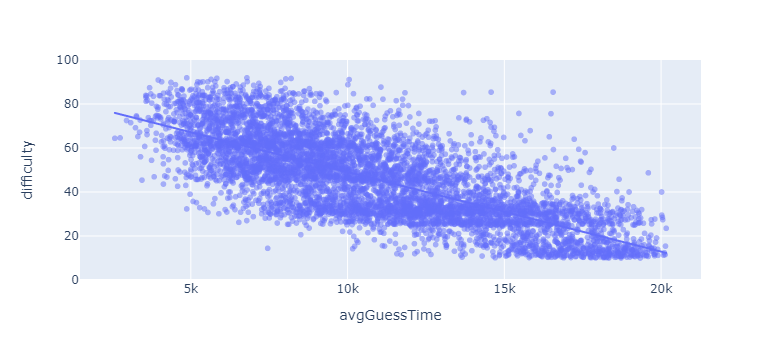

In [9]:
px.scatter(X, y='difficulty', x='avgGuessTime', trendline='ols', range_y=[0, 100], opacity=0.5)

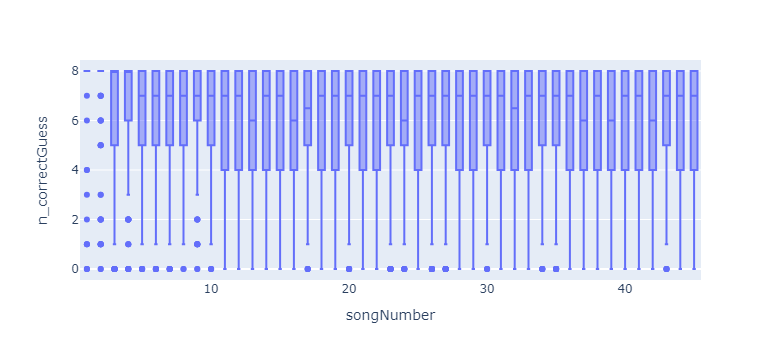

In [18]:
px.box(X, x='songNumber', y='n_correctGuess')